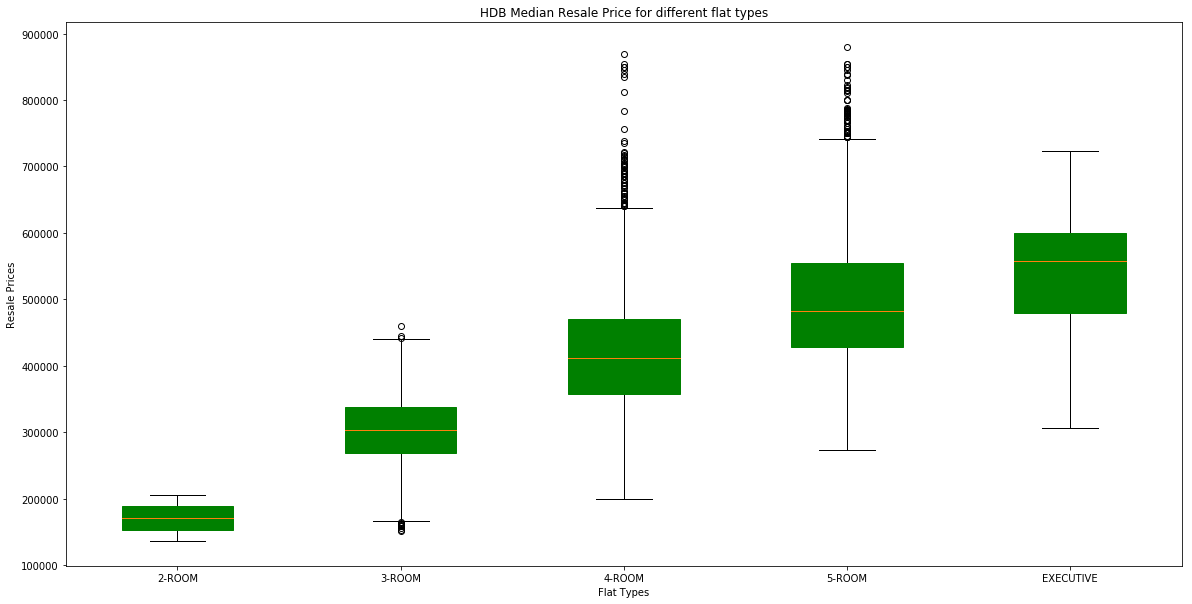

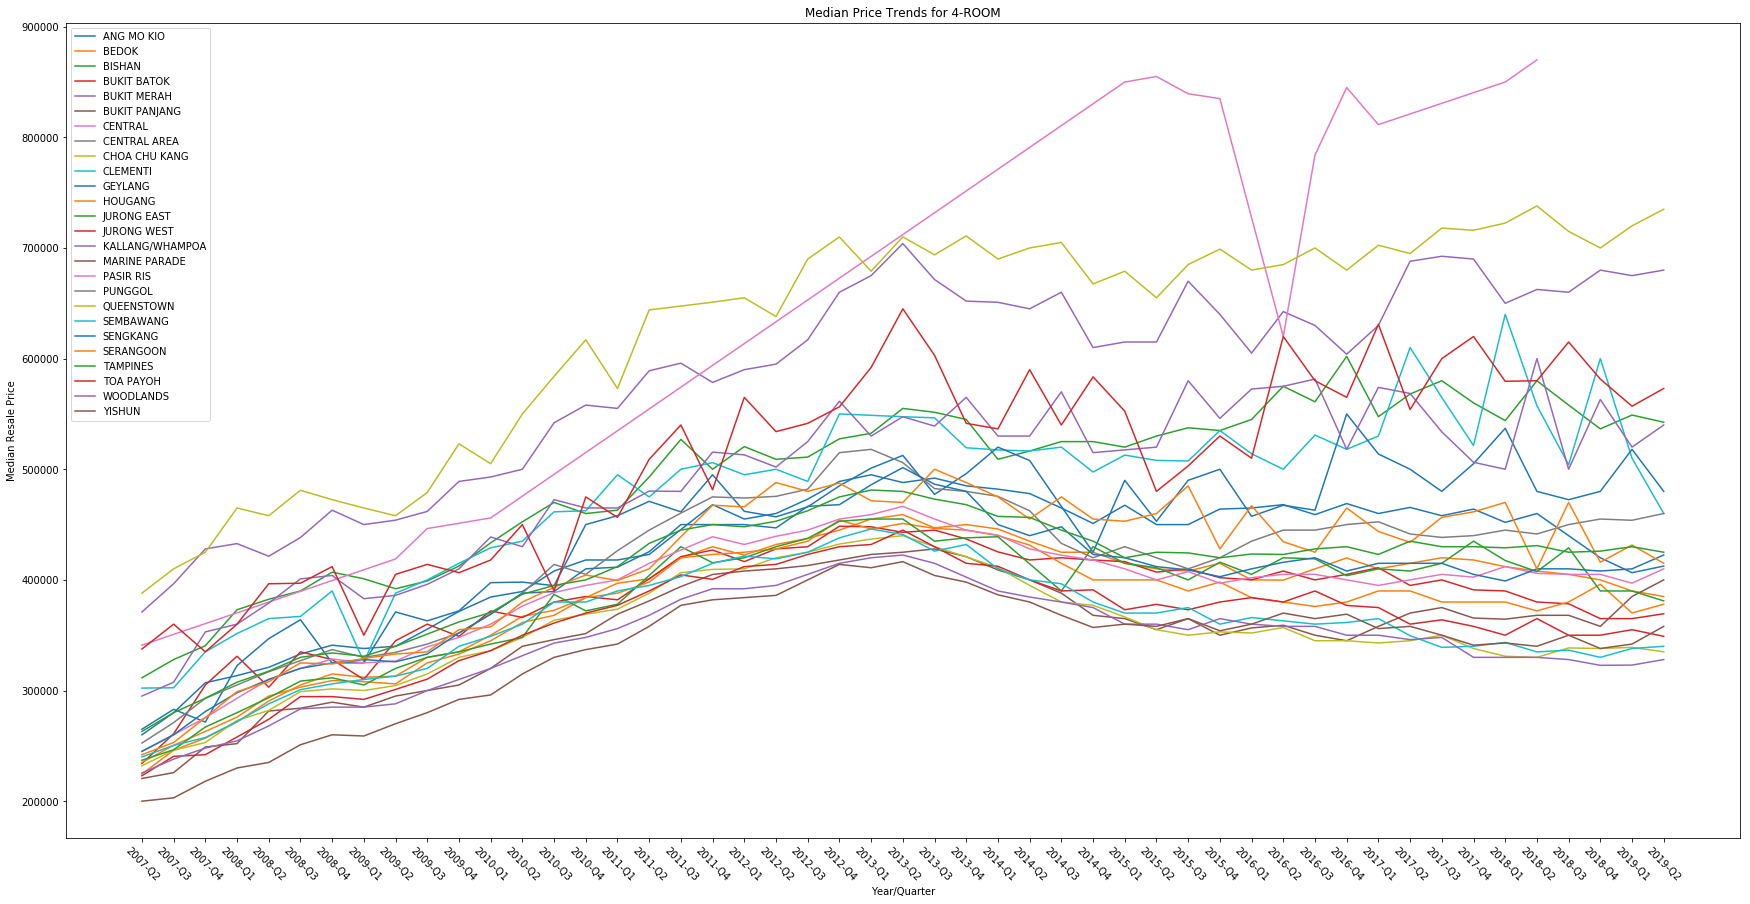

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# data obtained from https://data.gov.sg/dataset/median-resale-prices-for-registered-applications-by-town-and-flat-type
d = np.genfromtxt('data/median-resale-prices-for-registered-applications-by-town-and-flat-type.csv',
                 delimiter=',',
                 skip_header=1,
                 missing_values=['na','-'],
                 filling_values=0,
                 dtype=[('quarter','U16'),('town','U16'),('flat_type','U16'),('price','f4')])

data = d[['flat_type','price']]
for i, item in enumerate(data):
    data[i]['flat_type'] = item['flat_type'].upper() # 1-room -> 1-ROOM
    if data[i]['flat_type'] == 'EXEC':
        data[i]['flat_type'] = 'EXECUTIVE'
        
# remove all invalid prices
clean_data = data[ data['price'] > 0 ]

# uppercase all flat type names
flat_types = np.array([v for v in clean_data['flat_type'] ])

    
prices = clean_data['price']

flat_types_unique = np.unique(flat_types)
flat_types_unique.sort()

flat_type_prices = []
for v in flat_types_unique:
    list_prices = prices[ flat_types == v ]
    flat_type_prices.append(list_prices)
    
fig = plt.figure(1, figsize=(20,10))
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Flat Types')
ax1.set_ylabel('Resale Prices')
# ax1.set_yticklabels(['{:.2f}'.format() for v in np.unique(clean_data['price']) ])
ax1.set_title('HDB Median Resale Price for different flat types')
hdb_bp = ax1.boxplot(flat_type_prices, labels=flat_types_unique, patch_artist=True)

for box in hdb_bp['boxes']:
    box.set(color='green', facecolor='black')

# i want to create a multi line chart to show the median price trend for each town
data2 = d[['quarter','flat_type', 'town', 'price']]
quarter_town_price = data2[ data2['price'] > 0 ]
quarter_town_flattype_price = quarter_town_price[ quarter_town_price['flat_type'] == '4-ROOM' ]

for i, v in enumerate(quarter_town_flattype_price):
    quarter_town_flattype_price[i]['town'] = v['town'].upper()

fig2 = plt.figure(2, figsize=(30,15))
ax2 = fig2.add_subplot(111)
ax2.set_title('Median Price Trends for 4-ROOM')
ax2.set_xlabel('Year/Quarter')
ax2.set_ylabel('Median Resale Price')
ax2.set_xticklabels(np.unique(quarter_town_flattype_price['quarter']), rotation=-45)
towns = np.unique(quarter_town_flattype_price['town'])
for town in towns:
    quarters = quarter_town_flattype_price[ quarter_town_flattype_price['town'] == town ]['quarter']
    prices = quarter_town_flattype_price[ quarter_town_flattype_price['town'] == town ]['price']
    ax2.plot(quarters, prices, label=town)
    
ax2.legend()
plt.show()